Algoritmos

In [ ]:
#to do
def knapSackNaive(W,P,c):
  i = len(W)

  def ks(W,P,c,i):
    if i == 0 or c <= 0:
      return 0
    if W[i-1] > c:
      return ks(W,P,c,i-1)
    else:
      return max(P[i-1]+ks(W,P,c-W[i-1],i-1), ks(W,P,c,i-1))
  
  return ks(W,P,c,i)

#to do
def knapSackMem(W,P,c):
  i = len(W)
  hashTab = dict()

  def ks(W,P,c,i):
    if i == 0 or c <= 0:
      return 0
    if (c,i) in hashTab.keys():
      return hashTab[(c,i)]
    if W[i-1]>c:
      hashTab[(c,i)] = ks(W,P,c,i-1)
      return hashTab[(c,i)]
    else:
      hashTab[(c,i)] = max(P[i-1]+ks(W,P,c-W[i-1],i-1), ks(W,P,c,i-1))
      return hashTab[(c,i)]
    
  return ks(W,P,c,i)

#to do
def knapSacTab(W,P,c):
  i = len(W)
  T = [ [ 0 for n in range(c+1) ] for m in range(i+1) ]
  
  def ks(W,P,c,i):
    for n in range(i + 1):
      for m in range(c + 1): 
        if n == 0 or m <= 0:
          T[n][m] = 0
        elif W[n-1] <= m:
          T[n][m] = max(P[n-1] + T[n-1][m-W[n-1]], T[n-1][m])
        else:
          T[n][m] = T[n-1][m]
    return T[i][c]

  return ks(W,P,c,i)
  

In [ ]:
assert knapSackNaive([10,20,30], [60,100,120], 50) == 220
assert knapSackNaive([10,20,30], [60,100,120], 35) == 160
assert knapSackNaive([10,20,30], [60,100,120], 60) == 280
assert knapSackNaive([10,20,30], [60,100,120], 10) == 60

assert knapSackMem([10,20,30], [60,100,120], 50) == 220
assert knapSackMem([10,20,30], [60,100,120], 35) == 160
assert knapSackMem([10,20,30], [60,100,120], 60) == 280
assert knapSackMem([10,20,30], [60,100,120], 10) == 60

assert knapSacTab([10,20,30], [60,100,120], 50) == 220
assert knapSacTab([10,20,30], [60,100,120], 35) == 160
assert knapSacTab([10,20,30], [60,100,120], 60) == 280
assert knapSacTab([10,20,30], [60,100,120], 10) == 60

Data Colection

In [ ]:
import time
from numpy import random

WEIGHT_DOMAIN = 100
PROFIT_DOMAIN = 1000
CAPACITY_PROBABILITY = 0.3

#defines the number of times each algorithm will be processed to obtain the average time
num_rounds = 5

alg_results = dict()

#calculates the executions average time
def avgTime(func, size, debug=True):
  t = 0
  for i in range(num_rounds):  
    random.seed(size+i)    
    W = list(random.randint(WEIGHT_DOMAIN, size=size))
    P = list(random.randint(PROFIT_DOMAIN, size=size))    
    c = random.randint(int(CAPACITY_PROBABILITY*size)*WEIGHT_DOMAIN)
    start = time.time()
    p = func(W,P,c)
    end = time.time()    
    t += end - start

    if debug:
      ##create a variable to store the debug results
      if 'DR' not in globals():
        global DR
        DR = dict()
      
      ##add the result or check if it is the same
      if (size,i) not in DR:
        DR[(size,i)] = p
      else:          
        assert p == DR[(size,i)]
      
  return t/num_rounds


#defines the algorithms to be processed
algorithms = [knapSackNaive,knapSackMem,knapSacTab]

sizes = [5,10,15,20]
#sizes = [100,200,300,400,500]

mapSizeToTime = dict()
for i in range(len(sizes)):
  print(f"Starting collect {i+1}")
  
  #map list size to algorithm average time
  for algorithm in algorithms:
    print('  > ', algorithm.__name__)  
    mapSizeToTime[f"{algorithm.__name__ }##{sizes[i]}"] = avgTime(algorithm, sizes[i], True)
  print("")

print(f"Finish data collection")

Starting collect 1
  >  knapSackNaive
  >  knapSackMem
  >  knapSacTab

Starting collect 2
  >  knapSackNaive
  >  knapSackMem
  >  knapSacTab

Starting collect 3
  >  knapSackNaive
  >  knapSackMem
  >  knapSacTab

Starting collect 4
  >  knapSackNaive
  >  knapSackMem
  >  knapSacTab

Finish data collection


Gráfico

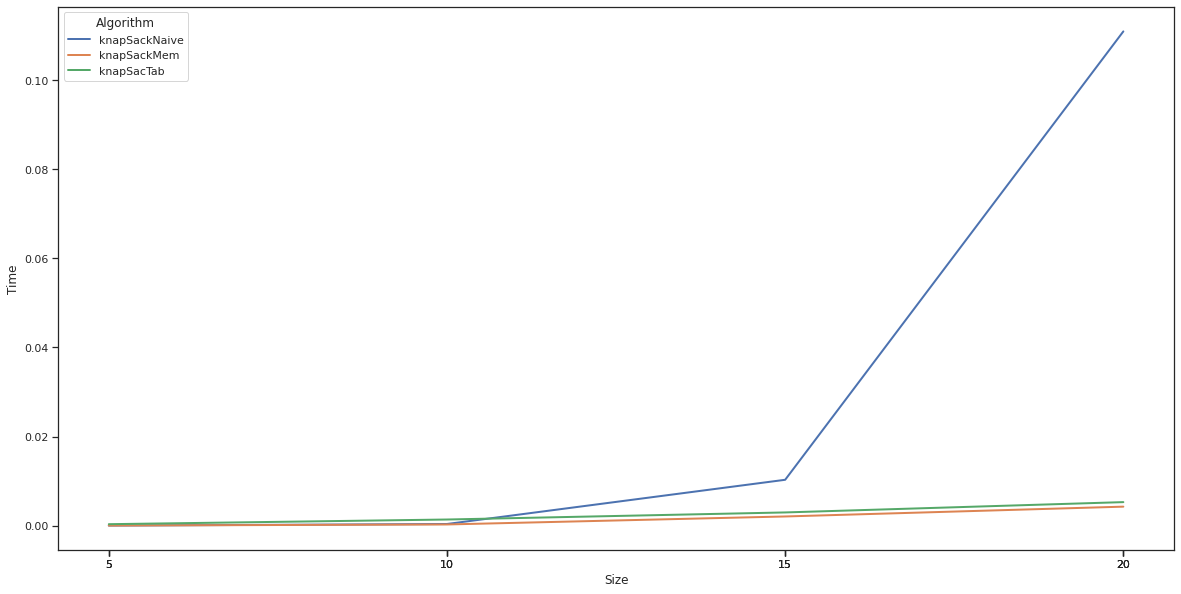

<Figure size 1440x720 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame.from_dict(mapSizeToTime, orient='index', columns=['Time'])
df['Algorithm'] = [i.split("##")[0] for i in df.index]
df['Size'] = [int(i.split("##")[1]) for i in df.index]
df

#Defines font size and line width
sns.set(font_scale=1, style="ticks", rc={"lines.linewidth": 2})

#Defines plot size
plt.rcParams['figure.figsize'] = [20, 10]

chart = sns.lineplot(x='Size', y='Time', hue='Algorithm', data=df)

#plt.yscale('log')
fig = plt.figure()
chart.set(xticks=[i for i in df.Size])
plt.show()

In [ ]:
import time
from numpy import random

WEIGHT_DOMAIN = 100
PROFIT_DOMAIN = 1000
CAPACITY_PROBABILITY = 0.3

#defines the number of times each algorithm will be processed to obtain the average time
num_rounds = 5

alg_results = dict()

#calculates the executions average time
def avgTime(func, size, debug=True):
  t = 0
  for i in range(num_rounds):  
    random.seed(size+i)    
    W = list(random.randint(WEIGHT_DOMAIN, size=size))
    P = list(random.randint(PROFIT_DOMAIN, size=size))    
    c = random.randint(int(CAPACITY_PROBABILITY*size)*WEIGHT_DOMAIN)
    start = time.time()
    p = func(W,P,c)
    end = time.time()    
    t += end - start

    if debug:
      ##create a variable to store the debug results
      if 'DR' not in globals():
        global DR
        DR = dict()
      
      ##add the result or check if it is the same
      if (size,i) not in DR:
        DR[(size,i)] = p
      else:          
        assert p == DR[(size,i)]
      
  return t/num_rounds


#defines the algorithms to be processed
algorithms = [knapSackMem,knapSacTab]

#sizes = [5,10,15,20]
sizes = [100,200,300,400,500]

mapSizeToTime = dict()
for i in range(len(sizes)):
  print(f"Starting collect {i+1}")
  
  #map list size to algorithm average time
  for algorithm in algorithms:
    print('  > ', algorithm.__name__)  
    mapSizeToTime[f"{algorithm.__name__ }##{sizes[i]}"] = avgTime(algorithm, sizes[i], True)
  print("")

print(f"Finish data collection")

Starting collect 1
  >  knapSackMem
  >  knapSacTab

Starting collect 2
  >  knapSackMem
  >  knapSacTab

Starting collect 3
  >  knapSackMem
  >  knapSacTab

Starting collect 4
  >  knapSackMem
  >  knapSacTab

Starting collect 5
  >  knapSackMem
  >  knapSacTab

Finish data collection


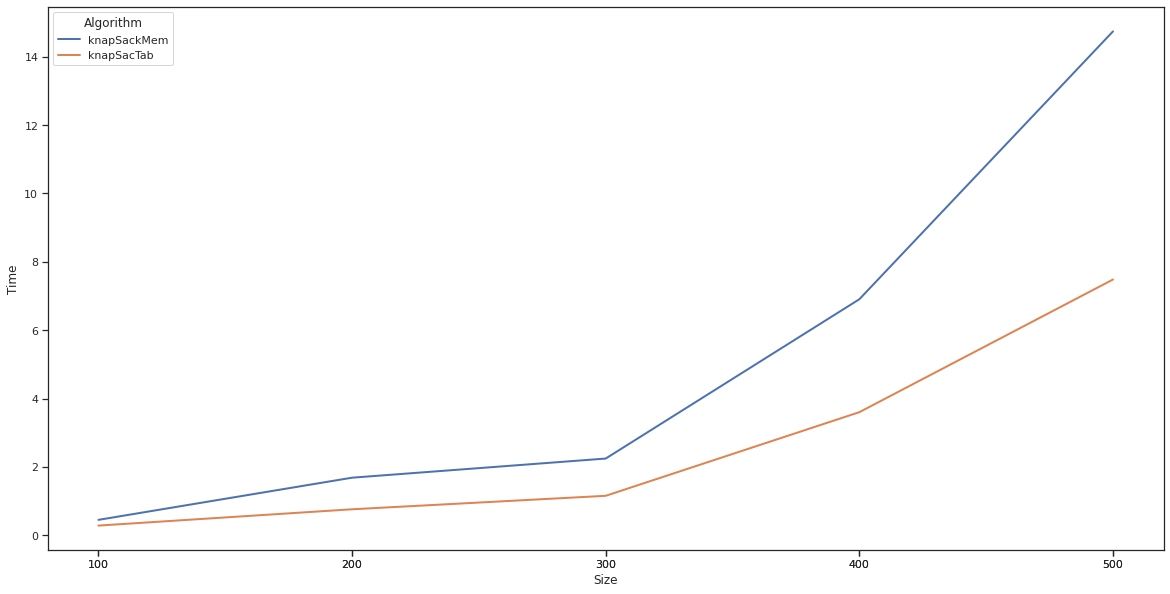

<Figure size 1440x720 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame.from_dict(mapSizeToTime, orient='index', columns=['Time'])
df['Algorithm'] = [i.split("##")[0] for i in df.index]
df['Size'] = [int(i.split("##")[1]) for i in df.index]
df

#Defines font size and line width
sns.set(font_scale=1, style="ticks", rc={"lines.linewidth": 2})

#Defines plot size
plt.rcParams['figure.figsize'] = [20, 10]

chart = sns.lineplot(x='Size', y='Time', hue='Algorithm', data=df)

#plt.yscale('log')
fig = plt.figure()
chart.set(xticks=[i for i in df.Size])
plt.show()